# Import libraries

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Define path to the data folder

# Define path to the data folder

In [26]:
# Define the base path to the project folder

base_path = r'C:\Users\New User\OneDrive\Documents\05-2024 Instacart Basket Analysis'

In [27]:
# Define the path to the 'Prepared Data' folder

prepared_data_path = os.path.join(base_path, '02 Data', 'Prepared Data')

In [28]:
# Define the path to the 'Visualizations' folder

visualizations_path = os.path.join(base_path, '04 Analysis', 'Visualizations')

# Load the dataframe

In [30]:
# Load the orders_products_merged_updated.pkl dataframe

ords_prods_merge = pd.read_pickle(os.path.join(prepared_data_path, 'orders_products_merged_updated.pkl'))

# Check if the dataframe is loaded correctly

# Check if the dataframe is loaded correctly

In [31]:
ords_prods_merge.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,_merge,...,merge_flag,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days_since_last_order,order_frequency_flag
0,2,33120.0,1.0,1.0,202279,3,5,9,8.0,both,...,both,Regularly busy,Regular days,Most orders,9,New customer,8.618889,Low spender,24.0,Non-frequent customer
1,2,28985.0,2.0,1.0,202279,3,5,9,8.0,both,...,both,Regularly busy,Regular days,Most orders,9,New customer,8.618889,Low spender,24.0,Non-frequent customer
2,2,9327.0,3.0,0.0,202279,3,5,9,8.0,both,...,both,Regularly busy,Regular days,Most orders,9,New customer,8.618889,Low spender,24.0,Non-frequent customer
3,2,45918.0,4.0,1.0,202279,3,5,9,8.0,both,...,both,Regularly busy,Regular days,Most orders,9,New customer,8.618889,Low spender,24.0,Non-frequent customer
4,2,30035.0,5.0,0.0,202279,3,5,9,8.0,both,...,both,Regularly busy,Regular days,Most orders,9,New customer,8.618889,Low spender,24.0,Non-frequent customer


# Create bar chart for “orders_day_of_week” column from largest to smallest

# Create bar chart for “orders_day_of_week” column from largest to smallest

<Axes: xlabel='orders_day_of_week'>

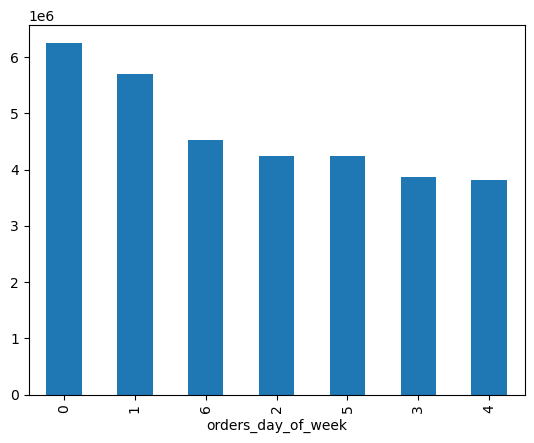

In [13]:
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

# Showing bars according to index

# Showing bars according to index

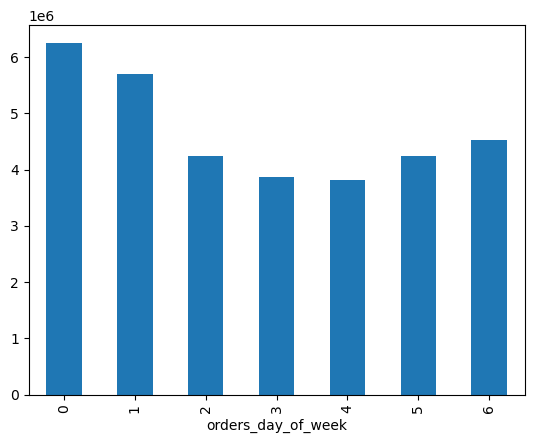

In [14]:
bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

# Applying the same above trick to printing the frequencies of the “orders_day_of_week” column

# Applying the same above trick to printing the frequencies of the “orders_day_of_week” column

In [15]:
ords_prods_merge['orders_day_of_week'].value_counts()

orders_day_of_week
0    6252941
1    5696724
6    4530304
2    4243173
5    4236989
3    3868747
4    3812390
Name: count, dtype: int64

# Showing frequencies according to index 

# Showing frequencies according to index 

In [16]:
ords_prods_merge['orders_day_of_week'].value_counts().sort_index()

orders_day_of_week
0    6252941
1    5696724
2    4243173
3    3868747
4    3812390
5    4236989
6    4530304
Name: count, dtype: int64

# Make the bar more distict by adding colour using argument in the plot.bar() function

# Make the bar more distict by adding colour using argument in the plot.bar() function

<Axes: xlabel='orders_day_of_week'>

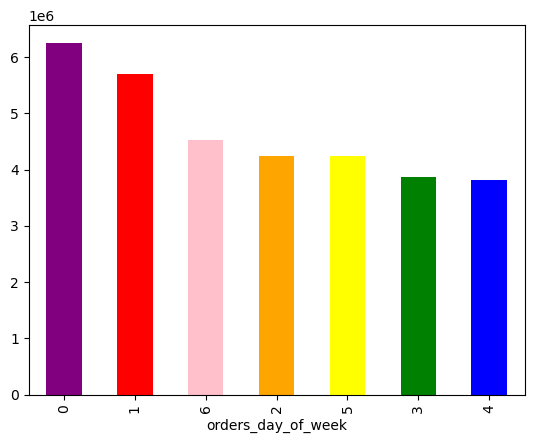

In [17]:
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

# Saving the visulaization into the jupyter memory

# Saving the visulaization into the jupyter memory

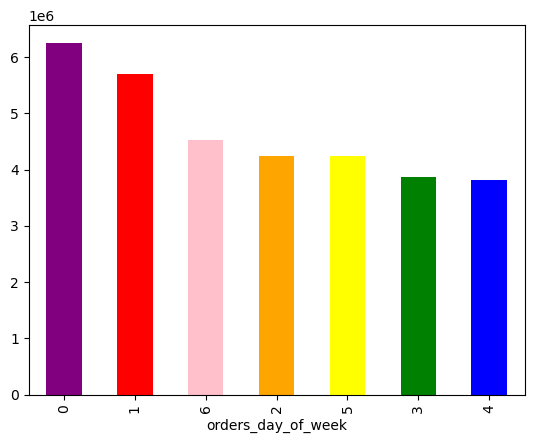

In [18]:
bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

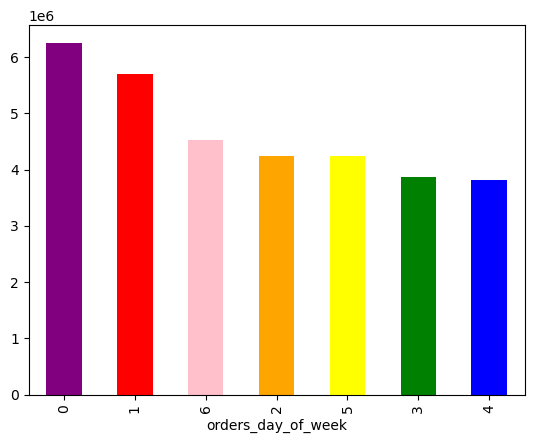

In [19]:
bar.figure

# Export the visual outside of jupyter in the form of an image file

# Export the visual outside of jupyter in the form of an image file

# Step 1. Save the bar chart to the specified path

# Step 1. Save the bar chart to the specified path

In [32]:
# Save the bar chart to the specified path

output_file = os.path.join(visualizations_path, 'bar_orders_dow.png')
bar.figure.savefig(output_file)

In [33]:
print(f"Bar chart saved to: {output_file}")

Bar chart saved to: C:\Users\New User\OneDrive\Documents\05-2024 Instacart Basket Analysis\04 Analysis\Visualizations\bar_orders_dow.png


# Creating histogram of the “prices” column

# Creating histogram of the “prices” column

<Axes: ylabel='Frequency'>

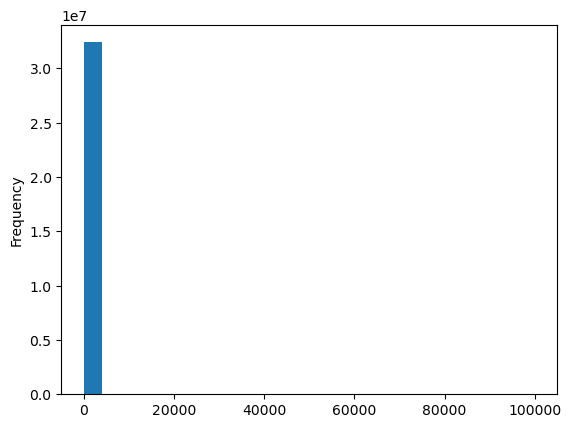

In [34]:
ords_prods_merge['prices'].plot.hist(bins = 25)

# Ploting a scatterplot of the 'prices' column against itself

# Ploting a scatterplot of the 'prices' column against itself

<Axes: xlabel='prices', ylabel='prices'>

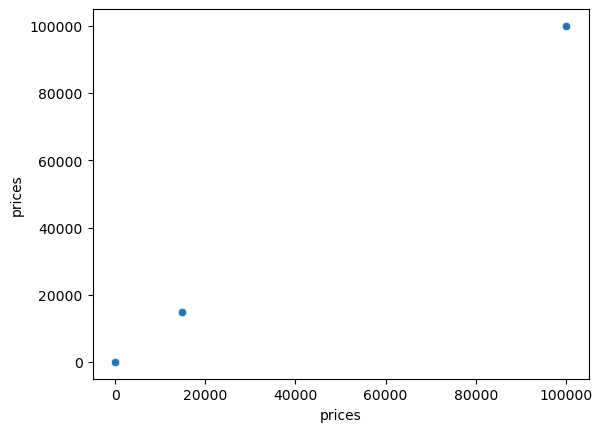

In [35]:
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

# Checking for outliers in prices, taking '$100' as normal prices to maximally spent for an item in a supermakert

# Checking for outliers in prices, taking '$100' as normal prices to maximally spent for an item in a supermakert

In [36]:
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,_merge,...,merge_flag,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days_since_last_order,order_frequency_flag
347,43,21553.0,6.0,1.0,39630,14,5,17,4.0,both,...,both,Regularly busy,Regular days,Average orders,15,Regular customer,304.253000,High spender,4.0,Frequent customer
9187,950,21553.0,20.0,0.0,187854,16,1,11,16.0,both,...,both,Regularly busy,Busiest days,Most orders,31,Regular customer,95.273077,High spender,11.0,Regular customer
10809,1115,21553.0,14.0,1.0,168014,15,6,14,30.0,both,...,both,Regularly busy,Regular days,Most orders,22,Regular customer,100.808075,High spender,9.0,Frequent customer
11158,1155,21553.0,18.0,1.0,103747,22,1,13,12.0,both,...,both,Regularly busy,Busiest days,Most orders,28,Regular customer,154.024939,High spender,7.0,Frequent customer
11780,1220,21553.0,19.0,0.0,23475,3,0,17,26.0,both,...,both,Busiest day,Busiest days,Average orders,4,New customer,337.015556,High spender,16.0,Regular customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32429984,3420548,21553.0,5.0,1.0,146887,3,4,11,7.0,both,...,both,Least busy,Slowest days,Most orders,21,Regular customer,294.755556,High spender,6.0,Frequent customer
32430527,3420604,21553.0,8.0,0.0,159443,8,2,13,6.0,both,...,both,Regularly busy,Regular days,Most orders,57,Loyal customer,103.623151,High spender,6.0,Frequent customer
32431189,3420676,21553.0,10.0,0.0,202268,50,5,16,6.0,both,...,both,Regularly busy,Regular days,Most orders,55,Loyal customer,38.192197,High spender,6.0,Frequent customer
32432672,3420827,21553.0,2.0,0.0,15643,1,1,10,7.0,both,...,both,Regularly busy,Busiest days,Most orders,15,Regular customer,91.850716,High spender,15.0,Regular customer


# Mark the outliers in the 'prices' column as missing values (they don't make sense in terms of other values in the column)

# Mark the outliers in the 'prices' column as missing values (they don't make sense in terms of other values in the column)

In [42]:
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

# Check whether the replacement was successful

In [43]:
ords_prods_merge['prices'].max()

25.0

# Retry creating the histogram of the “prices” colum again after the ad-hoc data cleaning

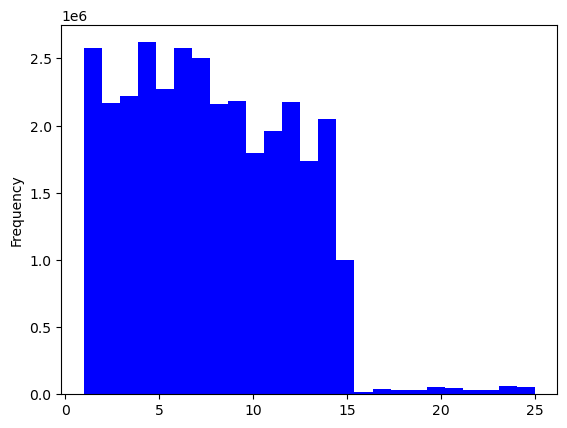

In [47]:
hist = ords_prods_merge['prices'].plot.hist(bins = 25, color = 'blue')


# Increase the level of granularity in the histogram, by increasing the number of bins 

Text(0, 0.5, 'Frequency')

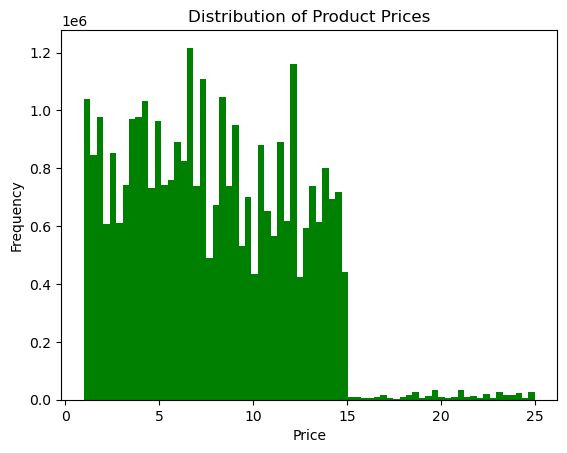

In [49]:
hist_2 = ords_prods_merge['prices'].plot.hist(bins = 70, color = 'green')
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Export the histogram outside of jupyter in the form of an image file

In [50]:
# Save the first histogram

hist.figure.savefig(os.path.join(visualizations_path, 'hist_price_distribution.png'))

In [51]:
# Clear the figure to avoid overlapping of plots

plt.clf()

<Figure size 640x480 with 0 Axes>

In [52]:
# Save the second histogram

hist_2.figure.savefig(os.path.join(visualizations_path, 'hist_2_price_distribution_2.png'))

In [53]:
# Clear the figure to avoid overlapping of plots

plt.clf()

<Figure size 640x480 with 0 Axes>

# To create a line chart by plotting the “orders_day_of_week” column on the x-axis and the “prices” column on the y-axis

# Create a sampling data

# Create a list holding True/Falseto the test np.random.rant() <= 0.7

In [54]:
# Create a list holding True/Falseto the test np.random.rant() <= 0.7

vp.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [55]:
dev

array([False,  True, False, ...,  True, False,  True])

In [56]:
np.random.rand(10)

array([0.79227379, 0.54149571, 0.53109233, 0.3016315 , 0.91662146,
       0.90125835, 0.66776966, 0.2148013 , 0.31056132, 0.19891516])

In [57]:
# Store 70% of the sample in a dataframe big

big = ords_prods_merge[dev]

In [58]:
# Store 30% of the sample in a dataframe small

small = ords_prods_merge[~dev]

# Check the results for expectation for successful subsetting)

In [59]:
len(ords_prods_merge)

32641268

In [60]:
len(big) + len(small)

32641268

# Reducing the samples to only those columns necessary for the chart, “prices” and “orders_day_of_week.” 

In [61]:
df_2 = small[['orders_day_of_week','prices']]

# Create the line chart

D:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


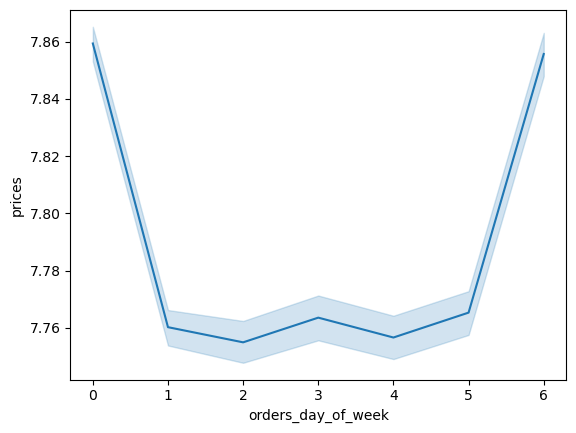

In [62]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

# Export line chart outside Jupyther

In [63]:
# Save the line chart

line.figure.savefig(os.path.join(visualizations_path, 'line_prices_vs_orders_dow.png'))